Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database (link alternativo no Kaggle)". 


In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

### 1. Separe os dados em treino (80%) e teste (20%).

In [2]:
# loading the data
df = pd.read_csv('../Lista-07/diabetes.csv')

In [3]:
# data description
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### 2. Crie e avalie modelos usando kNN, Logistic Regression, SVM e Naive Bayes. Aplique um Grid Search com Validação Cruzada (CV) com k=5 no k-Fold sobre o conjunto de treino. A métrica de avaliação usada deve ser a métrica F1-Score. Teste diferentes hiperparâmetros. Escolha o melhor algoritmo e hiperparâmetros baseado no Grid Search.

#### Standardization

In [5]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#### Padronization

In [6]:
minmax = MinMaxScaler()

X_train_mn = minmax.fit_transform(X_train)
X_test_mn = minmax.transform(X_test)

In [7]:
# dicionario que armazena os melhores parâmetros para cada modelo
results = {'scaler': [], 'model' : [],  'best_params' : [], 'best_score' : []}

In [8]:
def func(params, estimator, nome_estimator):
    
    clf = GridSearchCV(estimator, params, cv=5, scoring='f1')
    
    scalers = ['std', 'mn', 'no scaler']
    for scaler in scalers:
        if scaler == 'std':
            X_train_ = X_train_std
        elif scaler == 'mn':
            X_train_ = X_train_mn
        else:
            X_train_ = X_train
            
        clf.fit(X_train_, y_train)
        results['scaler'].append(scaler)
        results['best_params'].append(clf.best_params_)
        results['best_score'].append(clf.best_score_)
        results['model'].append(nome_estimator)

#### Support Vector Machine

In [9]:
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

svc = SVC()

func(params, svc, 'Support Vector Machine')

#### K-nearest neighbors

In [10]:
params = {'n_neighbors' : range(2, 11),
         'weights' :  ['uniform', 'distance']}

knn = KNeighborsClassifier()

func(params, knn, 'K-nearest neighbors')

### Logistic Regression 

In [11]:
params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log = LogisticRegression()

func(params, log, 'Logistic Regression')

### Naive Bayes

#### GaussianNB

In [12]:
params = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]}

gsb = GaussianNB()

func(params, gsb, 'GaussianNB')

In [13]:
results = pd.DataFrame(results)
results.sort_values(by='best_score', ascending=False)

,scaler,model,best_params,best_score
11,no scaler,GaussianNB,{'var_smoothing': 1e-06},0.656041
9,std,GaussianNB,{'var_smoothing': 0.01},0.654787
10,mn,GaussianNB,{'var_smoothing': 0.001},0.654787
1,mn,Support Vector Machine,{'kernel': 'rbf'},0.647352
0,std,Support Vector Machine,{'kernel': 'linear'},0.643820
6,std,Logistic Regression,"{'penalty': 'l2', 'solver': 'newton-cg'}",0.639068
7,mn,Logistic Regression,"{'penalty': 'none', 'solver': 'newton-cg'}",0.639068
8,no scaler,Logistic Regression,"{'penalty': 'none', 'solver': 'newton-cg'}",0.639068
2,no scaler,Support Vector Machine,{'kernel': 'linear'},0.636516
3,std,K-nearest neighbors,"{'n_neighbors': 3, 'weights': 'uniform'}",0.601406


### 3 . Treine um novo modelo usando o melhor resultado do Grid Search sobre todos os dados de treino (80% do dataset).

In [14]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

In [15]:
gaussian = GaussianNB(var_smoothing=1e-06)

gaussian.fit(X_train_v2, y_train_v2)

GaussianNB(priors=None, var_smoothing=1e-06)

### 4. Avalie o modelo usando a métrica F1-Score sobre os dados de teste.

In [16]:
y_pred = gaussian.predict(X_test_v2)

print(f'f1_measure: {f1_score(y_test_v2, y_pred)}')

f1_measure: 0.5961538461538461


### 5. Desenhe as regiões de decisão em 2D. As regiões devem se basear nos dados de treino (80% do dataset). O gráfico deve mostrar os dados de teste (20% do dataset). Dica: transforme as features em 2D usando a técnica PCA (Principal Component Analysis), conforme mostramos em aula e no Jupyter Notebook que disponibilizamos.

In [25]:
pca = PCA(n_components=2)

new_X_train = pca.fit_transform(X_train_v2)

In [26]:
gaussian = GaussianNB()

gaussian.fit(new_X_train, y_train_v2)

GaussianNB(priors=None, var_smoothing=1e-09)

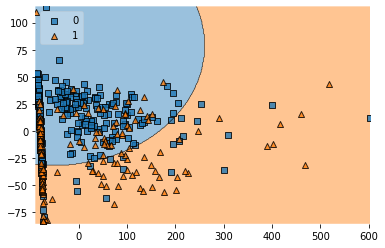

In [27]:
plot_decision_regions(new_X_train, y_train_v2, clf = gaussian, legend=2)